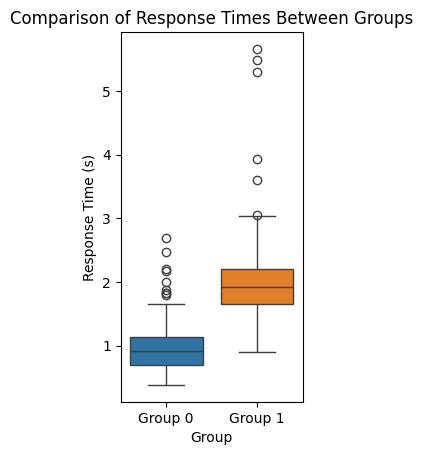

In [2]:
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Assuming your CSV files are named in a way that allows you to loop through them
# Replace 'path/to/data/{}{}.csv' with the actual path and naming convention of your CSV files
num_participants = 10
num_trials = 20

# Read and concatenate data for Group 0
group0_data = pd.concat([pd.read_csv('../group0/{}{}.csv'.format(0, i+1)).assign(Participant=i+1) for i in range(num_participants)], axis=0)

# Read and concatenate data for Group 1
group1_data = pd.concat([pd.read_csv('../group1/{}{}.csv'.format(1, i+1)).assign(Participant=i+1) for i in range(num_participants)], axis=0)

# Make the 'Trial' column 1-indexed
group0_data['Trial'] = group0_data['Trial'] + 1
group1_data['Trial'] = group1_data['Trial'] + 1

# Descriptive statistics for each group
group0_stats = group0_data['Response Time (s)'].describe()
group1_stats = group1_data['Response Time (s)'].describe()

# Independent samples t-test
t_stat, p_value = ttest_ind(group0_data['Response Time (s)'], group1_data['Response Time (s)'])

# Visualization using box plots
combined_data = pd.concat([group0_data['Response Time (s)'], group1_data['Response Time (s)']], axis=1)
combined_data.columns = ['Group 0', 'Group 1']

sns.boxplot(data=combined_data)
plt.title('Comparison of Response Times Between Groups')
plt.xlabel('Group')
plt.ylabel('Response Time (s)')
# Adjust the aspect ratio to elongate the plot
plt.gca().set_aspect(0.7)
plt.show()



In [3]:
# Detect and print outliers using the IQR method
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Identify outliers for each group
group0_outliers = detect_outliers(group0_data['Response Time (s)'])
group1_outliers = detect_outliers(group1_data['Response Time (s)'])

# Create DataFrames with custom index names
group0_outliers_df = pd.DataFrame({'Trial': group0_outliers.index + 1, 'Response Time (s)': group0_outliers.values})
group1_outliers_df = pd.DataFrame({'Trial': group1_outliers.index + 1, 'Response Time (s)': group1_outliers.values})

# Print outliers with custom index names
print("Outliers in Group 0:")
print(group0_outliers_df)

print("\nOutliers in Group 1:")
print(group1_outliers_df)



Outliers in Group 0:
   Trial  Response Time (s)
0     12           1.828673
1      1           2.006372
2      3           2.197016
3      4           1.872900
4      1           2.172293
5     11           2.685115
6     12           2.465657
7     13           1.793189
8     19           1.829200

Outliers in Group 1:
   Trial  Response Time (s)
0      1           5.661445
1      1           5.302738
2      1           3.931018
3      1           3.595649
4     10           3.060652
5      2           5.486099


In [4]:
# Remove outliers from the original datasets
group0_no_outliers = group0_data[~group0_data['Response Time (s)'].isin(group0_outliers.values)]
group1_no_outliers = group1_data[~group1_data['Response Time (s)'].isin(group1_outliers.values)]

group0_stats = group0_no_outliers['Response Time (s)'].describe()
group1_stats = group1_no_outliers['Response Time (s)'].describe()

# Print results
print(f"Descriptive Statistics for Group 0 (after removing outliers):\n{group0_stats}")
print(f"\nDescriptive Statistics for Group 1 (after removing outliers):\n{group1_stats}")



Descriptive Statistics for Group 0 (after removing outliers):
count    191.000000
mean       0.924588
std        0.295746
min        0.383941
25%        0.688820
50%        0.896776
75%        1.074771
max        1.660650
Name: Response Time (s), dtype: float64

Descriptive Statistics for Group 1 (after removing outliers):
count    194.000000
mean       1.929179
std        0.397283
min        0.905061
25%        1.645900
50%        1.914489
75%        2.158404
max        3.043493
Name: Response Time (s), dtype: float64


In [5]:
import pandas as pd
from scipy import stats

group0_times = group0_no_outliers['Response Time (s)']
group1_times = group1_no_outliers['Response Time (s)']

# Shapiro-Wilk test for normality

shapiro_group0 = stats.shapiro(group0_times)
shapiro_group1 = stats.shapiro(group1_times)

# Levene's test for homogeneity of variances
levene_test = stats.levene(group0_times, group1_times)

# Print the results
print("Shapiro-Wilk test for normality:")
print(f"Group 0: p-value = {shapiro_group0.pvalue:.4f}")
print(f"Group 1: p-value = {shapiro_group1.pvalue:.4f}")
print("\nLevene's test for homogeneity of variances:")
print(f"Levene's test p-value = {levene_test.pvalue:.4f}")

Shapiro-Wilk test for normality:
Group 0: p-value = 0.0001
Group 1: p-value = 0.0040

Levene's test for homogeneity of variances:
Levene's test p-value = 0.0009


In [6]:
from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(group0_times, group1_times)
print(f"Mann-Whitney U Test:")
print(f"U-statistic = {statistic:.4f}")
print(f"P-value = {p_value}")

Mann-Whitney U Test:
U-statistic = 711.0000
P-value = 7.303072572512379e-60


/tmp/ipykernel_5447/1810200974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group0_no_outliers['Group'] = 'Group 0 (No Outliers)'
/tmp/ipykernel_5447/1810200974.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group1_no_outliers['Group'] = 'Group 1 (No Outliers)'


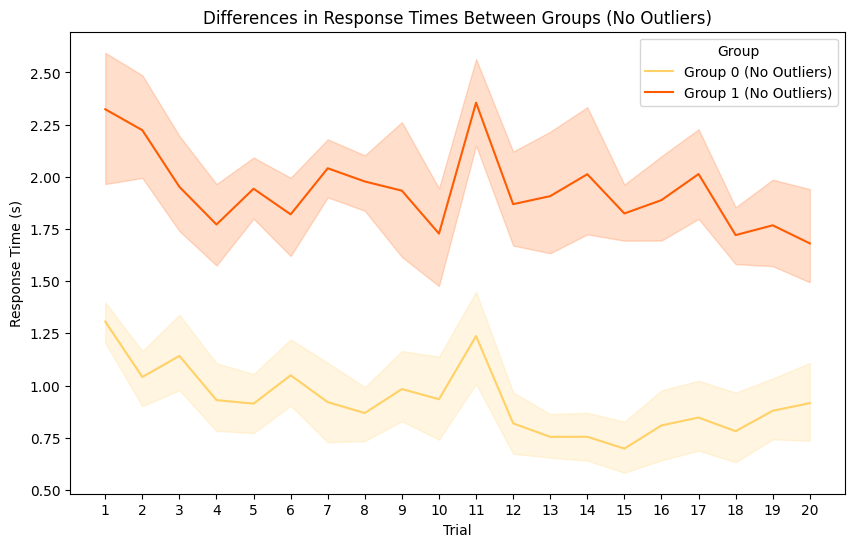

In [7]:

# Add a 'Group' column to indicate the group
group0_no_outliers['Group'] = 'Group 0 (No Outliers)'
group1_no_outliers['Group'] = 'Group 1 (No Outliers)'

# Combine the datasets for easy plotting
combined_data = pd.concat([group0_no_outliers, group1_no_outliers])
# Subtract 1 from the "Trial" column to make it 1-indexed
combined_data['Trial'] = combined_data['Trial'] - 1
# Plot the line plot
plt.figure(figsize=(10, 6))
# Define a custom color palette in hex values
custom_palette = ["#FFD166", "#FF5B00", "#8C401A", "#593E1A"]

# Set the custom palette
sns.set_palette(custom_palette)
sns.lineplot(x='Trial', y='Response Time (s)', hue='Group', data=combined_data)

plt.title('Differences in Response Times Between Groups (No Outliers)')
plt.xlabel('Trial')
plt.ylabel('Response Time (s)')
plt.legend(title='Group')

# Set x-axis ticks at intervals of 1
plt.xticks(range(1, combined_data['Trial'].max() + 1))
plt.show()
